In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.
#(Show the shape and column names as well.)
#(Include your Python code and output in the code box below.
df = pd.read_csv("BIKE_DETAILS.csv")
print(df.head(10))
print(df.shape)
print(df.columns)

                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner      12000     

In [ ]:
#Question 2: Check for missing values in all columns and describe your approach for handling them.
#(Include your Python code and output in the code box below.)
df.isnull().count()

,0
name,1061
selling_price,1061
year,1061
seller_type,1061
owner,1061
km_driven,1061
ex_showroom_price,1061


<Axes: xlabel='selling_price', ylabel='Density'>

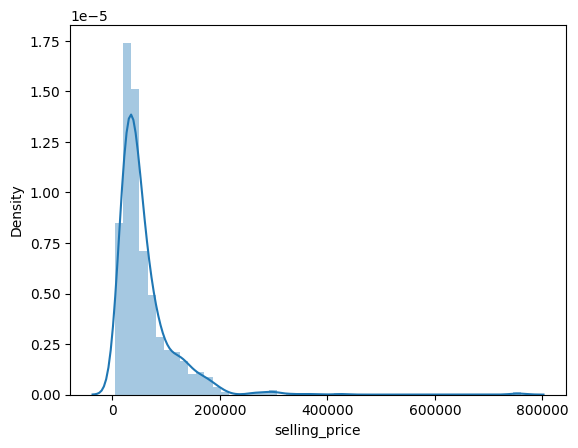

In [ ]:
#Question 3: Plot the distribution of selling prices using a histogram and describe the overall trend.
#(Include your Python code and output in the code box below.)
sns.distplot(df['selling_price'])

#selling price is right skewed


<Axes: xlabel='seller_type'>

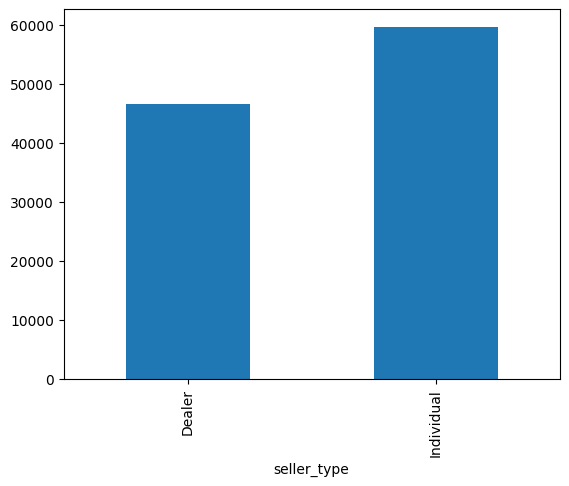

In [ ]:
#Question 4: Create a bar plot to visualize the average selling price for each seller_type and write one observation.
#(Include your Python code and output in the code box below.)
df.groupby('seller_type')['selling_price'].mean().plot(kind='bar')

#Individual seller has higher average price

<Axes: xlabel='owner'>

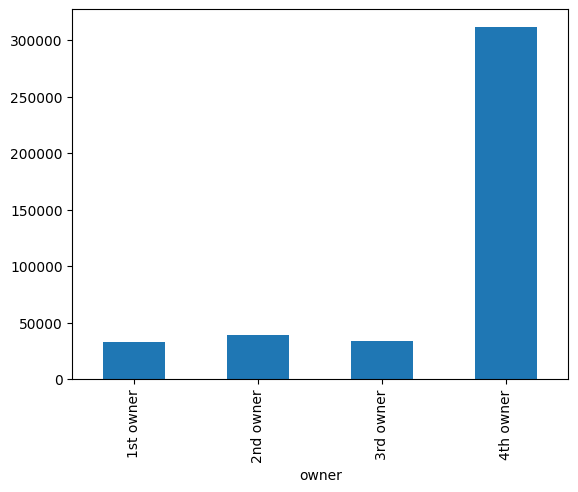

In [ ]:
#Question 5: Compute the average km_driven for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar plot.
#(Include your Python code and output in the code box below.)
df.groupby('owner')['km_driven'].mean().plot(kind='bar')

In [4]:
#Question 6: Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.
#(Include your Python code and output in the code box below.)
q1 = df['km_driven'].quantile(0.25)
q3 = df['km_driven'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify and remove outliers
df_cleaned = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

# After outlier removal: Summary statistics
print("Summary statistics of 'km_driven' AFTER outlier removal:")
print(df_cleaned['km_driven'].describe())

Summary statistics of 'km_driven' AFTER outlier removal:
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


<Axes: xlabel='age', ylabel='selling_price'>

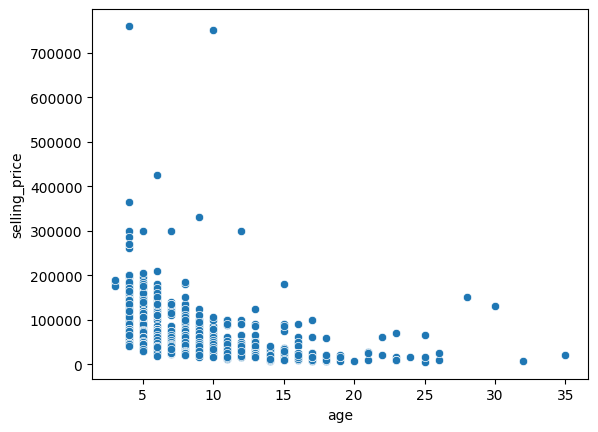

In [ ]:
#Question 7: Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price. (Include your Python code and output in the code box below.)
df['age'] = 2023 - df['year']
sns.scatterplot(x='age', y='selling_price', data=df)

In [ ]:
#Question 8: Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.
#(Include your Python code and output in the code box below.)
df_encoded = pd.get_dummies(df, columns=['seller_type'])
print(df_encoded.head(5))

                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  age  seller_type_Dealer  \
0        350                NaN    4               False   
1       5650                NaN    6               False   
2      12000           148114.0    5               False   
3      23000            89643.0    8               False   
4      21000                NaN   12               False   

   seller_type_Individual  
0                    True  
1                    True  
2                    True  
3                    True  
4                    True  


<Axes: >

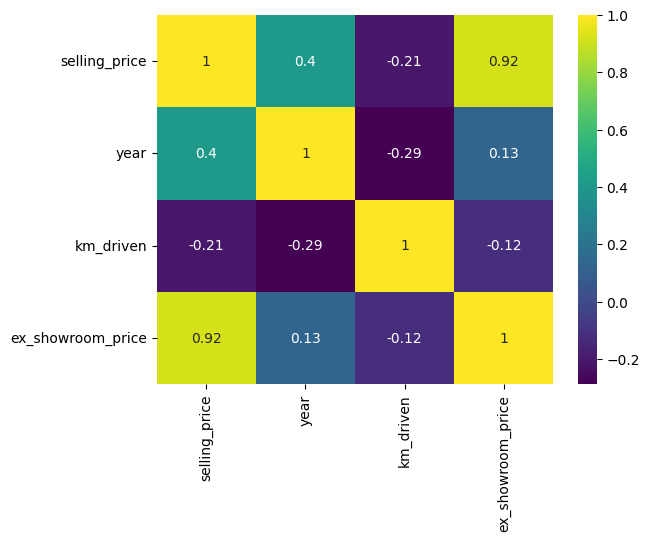

In [ ]:
#Question 9: Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?
#(Include your Python code and output in the code box below.)
numeric_cols= df.select_dtypes(include=np.number)
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix,cmap='viridis', annot=True)

In [18]:
#Question 10: Summarize your findings in a brief report:
#● What are the most important factors affecting a bike's selling price?
#● Mention any data cleaning or feature engineering you performed.
#(Include your Python code and output in the code box below.)


#year, km_driven and owner are affecting the bikes selling price
#convert data type of km_driven and ex showroom price columns to numeric

